In [ ]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# we can directly convert words to vector
wv_great = wv['great']

In [ ]:
# the size of vector is usually 300
wv_great.shape

(300,)

In [ ]:
wv_great

array([ 7.17773438e-02,  2.08007812e-01, -2.84423828e-02,  1.78710938e-01,
        1.32812500e-01, -9.96093750e-02,  9.61914062e-02, -1.16699219e-01,
       -8.54492188e-03,  1.48437500e-01, -3.34472656e-02, -1.85546875e-01,
        4.10156250e-02, -8.98437500e-02,  2.17285156e-02,  6.93359375e-02,
        1.80664062e-01,  2.22656250e-01, -1.00585938e-01, -6.93359375e-02,
        1.04427338e-04,  1.60156250e-01,  4.07714844e-02,  7.37304688e-02,
        1.53320312e-01,  6.78710938e-02, -1.03027344e-01,  4.17480469e-02,
        4.27246094e-02, -1.10351562e-01, -6.68945312e-02,  4.19921875e-02,
        2.50000000e-01,  2.12890625e-01,  1.59179688e-01,  1.44653320e-02,
       -4.88281250e-02,  1.39770508e-02,  3.55529785e-03,  2.09960938e-01,
        1.52343750e-01, -7.32421875e-02,  2.16796875e-01, -5.76171875e-02,
       -2.84423828e-02, -3.60107422e-03,  1.52343750e-01, -2.63671875e-02,
        2.13623047e-02, -1.51367188e-01,  1.04003906e-01,  3.18359375e-01,
       -1.85546875e-01,  

In [ ]:
df = pd.read_csv('fake_and_real_news.csv')

In [ ]:
df.shape

(9900, 2)

In [ ]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


## Preprocessing

In [ ]:
# conveting the label column into numeric

df['label_num'] = df['label'].map({'Fake': 0, 'Real': 1})

In [ ]:
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [ ]:
df.label.value_counts()

,count
label,
Fake,5000
Real,4900


In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**Sentence Embedding**  
A sentence embedding is a vector representation of an entire sentence or phrase in a continuous vector space. It captures the meaning of the sentence as a whole.

*for example:* Consider the sentence `Don't worry if you don't understand.`  

*Step-1:* After performing `preprocessing` and `lemmatization`, we will get ['worry', 'understand'] in a list.  
*Step-2:* We will vectorize each word in the list individually (`word embedding`) then take the average of all to create `sentence embedding`.



In [ ]:
# removing stop words and performing lemmatization and then vectorization
import spacy

nlp = spacy.load('en_core_web_lg')

def preprocess_and_vectorize(text):
  doc = nlp(text)
  filtered_tokens = []
  for token in doc:
    if token.is_stop or token.is_punct:
      continue

    filtered_tokens.append(token.lemma_)

  return wv.get_mean_vector(filtered_tokens) # sentence embedding



In [ ]:
preprocess_and_vectorize("Don't worry if you don't understand").shape

(300,)

In [ ]:
# creating a column to store the vectorize form of text in dataframe
df['vector'] = df['Text'].apply(lambda text: preprocess_and_vectorize(text))

In [ ]:
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[0.008657642, 0.019024342, -0.011917442, 0.032..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[0.010864096, 0.007960429, 0.0011915653, 0.014..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[0.018134918, 0.0062743523, -0.005872244, 0.03..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[0.01255197, 0.012613623, 5.9780963e-05, 0.021..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.0019059887, 0.011889367, 0.0035395357, 0.0..."


In [ ]:
# splitting the data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['vector'].values,
    df['label_num'],
    test_size=0.2,
    random_state=2022,
    stratify=df['label_num']
)

In [ ]:
X_train[:2]

array([array([-2.58219568e-03,  6.66544260e-03,  2.52646767e-03,  3.95730063e-02,
              -1.41182542e-02, -7.22123589e-03,  3.15938070e-02, -3.18326391e-02,
               1.62770562e-02,  2.15391051e-02, -2.36972049e-02, -3.72144543e-02,
              -6.70092739e-03,  1.64224133e-02, -2.48180293e-02,  4.60469536e-02,
               6.02065027e-03,  2.53213309e-02,  4.08343738e-03, -3.32745500e-02,
               6.01468608e-03,  1.92604307e-02,  4.28487025e-02, -2.15403945e-03,
               2.04510838e-02,  3.04712215e-03, -2.73784697e-02, -1.53319014e-03,
               6.67838380e-03, -3.27401888e-03, -1.53824072e-02,  9.19036320e-05,
              -2.74383668e-02, -3.54807038e-04, -1.12002371e-02, -1.66487973e-02,
               1.40579836e-02,  2.69189221e-03, -4.44610231e-03,  3.41382883e-02,
               5.02199680e-03, -1.35964267e-02,  4.29993980e-02,  1.10096289e-02,
              -5.67582203e-03, -1.63680799e-02, -2.08231565e-02,  8.67405720e-03,
              -1

*The array is present inside the array.* So this is not in the proper format.  
We have to convert the array into **`2d`** array

In [ ]:
print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)


Shape of X_train before reshaping:  (7920,)
Shape of X_test before reshaping:  (1980,)


In [ ]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [ ]:
print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train after reshaping:  (7920, 300)
Shape of X_test after reshaping:  (1980, 300)


In [ ]:
X_train_2d[:2]

array([[-2.58219568e-03,  6.66544260e-03,  2.52646767e-03,
         3.95730063e-02, -1.41182542e-02, -7.22123589e-03,
         3.15938070e-02, -3.18326391e-02,  1.62770562e-02,
         2.15391051e-02, -2.36972049e-02, -3.72144543e-02,
        -6.70092739e-03,  1.64224133e-02, -2.48180293e-02,
         4.60469536e-02,  6.02065027e-03,  2.53213309e-02,
         4.08343738e-03, -3.32745500e-02,  6.01468608e-03,
         1.92604307e-02,  4.28487025e-02, -2.15403945e-03,
         2.04510838e-02,  3.04712215e-03, -2.73784697e-02,
        -1.53319014e-03,  6.67838380e-03, -3.27401888e-03,
        -1.53824072e-02,  9.19036320e-05, -2.74383668e-02,
        -3.54807038e-04, -1.12002371e-02, -1.66487973e-02,
         1.40579836e-02,  2.69189221e-03, -4.44610231e-03,
         3.41382883e-02,  5.02199680e-03, -1.35964267e-02,
         4.29993980e-02,  1.10096289e-02, -5.67582203e-03,
        -1.63680799e-02, -2.08231565e-02,  8.67405720e-03,
        -1.27506657e-02,  3.22506502e-02, -1.29026920e-0

**Train Machine Learning Model**

**1. Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

clf = GradientBoostingClassifier()

clf.fit(X_train_2d, y_train)

y_pred = clf.predict(X_test_2d)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1000
           1       0.98      0.99      0.98       980

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



**Make some predictions**

In [ ]:
test_news = [
    "Michigan governor denies misleading U.S. House on Flint water (Reuters) - Michigan Governor Rick Snyder denied Thursday that he had misled a U.S. House of Representatives committee last year over testimony on Flintâ€™s water crisis after lawmakers asked if his testimony had been contradicted by a witness in a court hearing. The House Oversight and Government Reform Committee wrote Snyder earlier Thursday asking him about published reports that one of his aides, Harvey Hollins, testified in a court hearing last week in Michigan that he had notified Snyder of an outbreak of Legionnairesâ€™ disease linked to the Flint water crisis in December 2015, rather than 2016 as Snyder had testified. â€œMy testimony was truthful and I stand by it,â€ Snyder told the committee in a letter, adding that his office has provided tens of thousands of pages of records to the committee and would continue to cooperate fully.  Last week, prosecutors in Michigan said Dr. Eden Wells, the stateâ€™s chief medical executive who already faced lesser charges, would become the sixth current or former official to face involuntary manslaughter charges in connection with the crisis. The charges stem from more than 80 cases of Legionnairesâ€™ disease and at least 12 deaths that were believed to be linked to the water in Flint after the city switched its source from Lake Huron to the Flint River in April 2014. Wells was among six current and former Michigan and Flint officials charged in June. The other five, including Michigan Health and Human Services Director Nick Lyon, were charged at the time with involuntary manslaughter",
    " WATCH: Fox News Host Loses Her Sh*t, Says Investigating Russia For Hacking Our Election Is Unpatriotic This woman is insane.In an incredibly disrespectful rant against President Obama and anyone else who supports investigating Russian interference in our election, Fox News host Jeanine Pirro said that anybody who is against Donald Trump is anti-American. Look, it s time to take sides,  she began.",
    " Sarah Palin Celebrates After White Man Who Pulled Gun On Black Protesters Goes Unpunished (VIDEO) Sarah Palin, one of the nigh-innumerable  deplorables  in Donald Trump s  basket,  almost outdid herself in terms of horribleness on Friday."
]

test_news_vectors = [preprocess_and_vectorize(n) for n in test_news]
clf.predict(test_news_vectors)

array([1, 0, 0])

**Confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[976,  24],
       [ 11, 969]])

Text(95.72222222222221, 0.5, 'Truth')

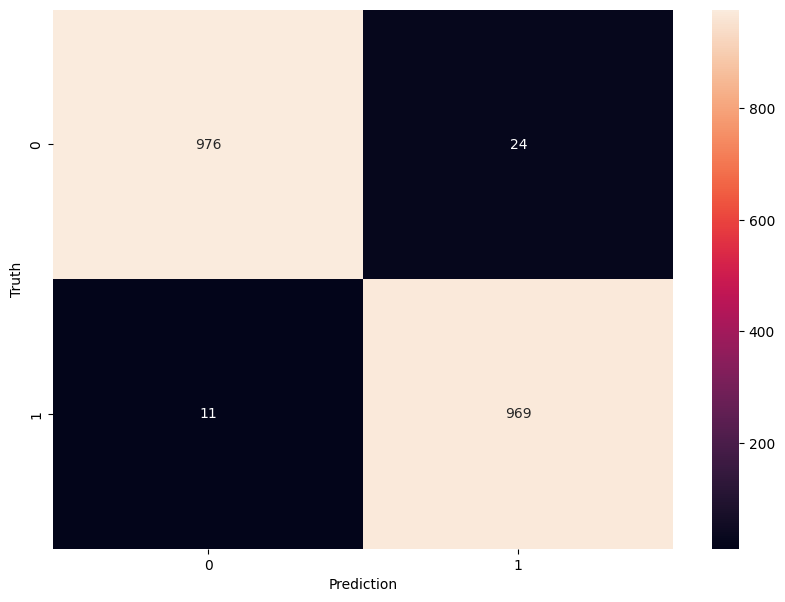

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

**2. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf2 = RandomForestClassifier()

clf2.fit(X_train_2d, y_train)

y_pred = clf2.predict(X_test_2d)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1000
           1       0.96      0.98      0.97       980

    accuracy                           0.97      1980
   macro avg       0.97      0.97      0.97      1980
weighted avg       0.97      0.97      0.97      1980



Text(95.72222222222221, 0.5, 'Truth')

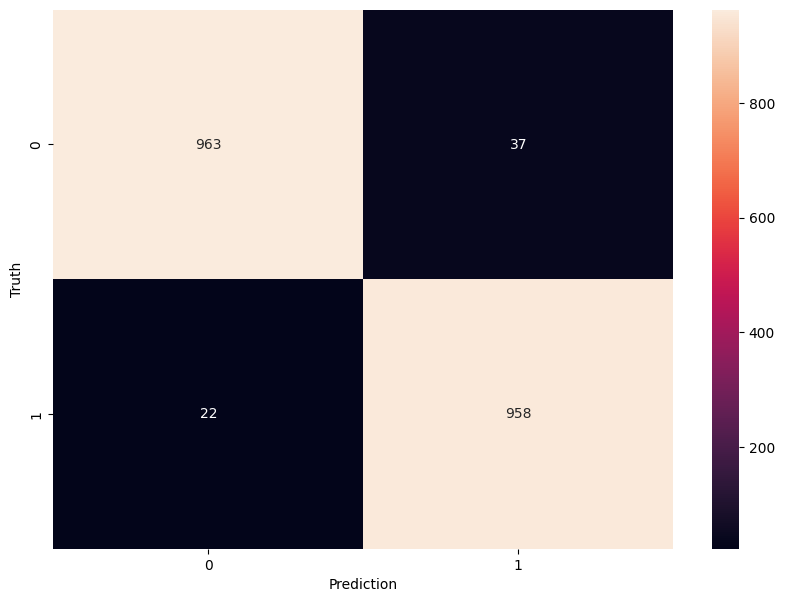

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')